<a href="https://colab.research.google.com/github/Draksahil/project-demo/blob/main/Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [26]:
# ML Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
data = pd.read_csv("Crop_recommendation.csv")

In [28]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [29]:
X = data.drop("label", axis=1)
y = data["label"]

In [30]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [31]:
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc * 100:.2f}%")

Random Forest Accuracy: 99.32%
SVM Accuracy: 96.82%
Decision Tree Accuracy: 98.86%
KNN Accuracy: 95.68%


In [36]:
sample = [[90, 40, 40, 24.5, 80, 6.5, 200]]

In [37]:
best_model = models["Random Forest"]
sample_scaled = scaler.transform(sample)
prediction = best_model.predict(sample_scaled)
print("Recommended Crop:", prediction[0])

Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
import matplotlib.pyplot as plt

In [39]:
accuracies = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc * 100)

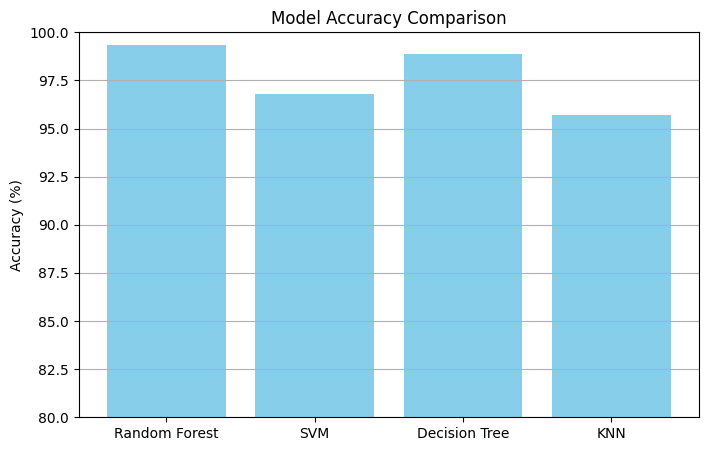

In [40]:

plt.figure(figsize=(8, 5))
plt.bar(models.keys(), accuracies, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(80, 100)
plt.grid(axis='y')
plt.show()

In [41]:
import joblib

In [42]:
joblib.dump(best_model, 'crop_recommendation_model.pkl')

['crop_recommendation_model.pkl']

In [43]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [44]:
loaded_model = joblib.load('crop_recommendation_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

In [45]:
new_input = [[85, 35, 45, 25.0, 70.0, 6.4, 210.0]]
new_input_scaled = loaded_scaler.transform(new_input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:

prediction = loaded_model.predict(new_input_scaled)
print("Predicted Crop:", prediction[0])

Predicted Crop: coffee
